# HOMEWORK 7

In this homework you are going to rectify a document image that suffers from severe distortion. You will be using the same image and the same detected corners from the previous lesson (lesson 6).

Remember, OpenCV documentation is your friend ;-)

At the end of this notebook, there are a couple of questions for you to answer.

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Let's load the image we will be working on in this homework.

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fb13c850520>)

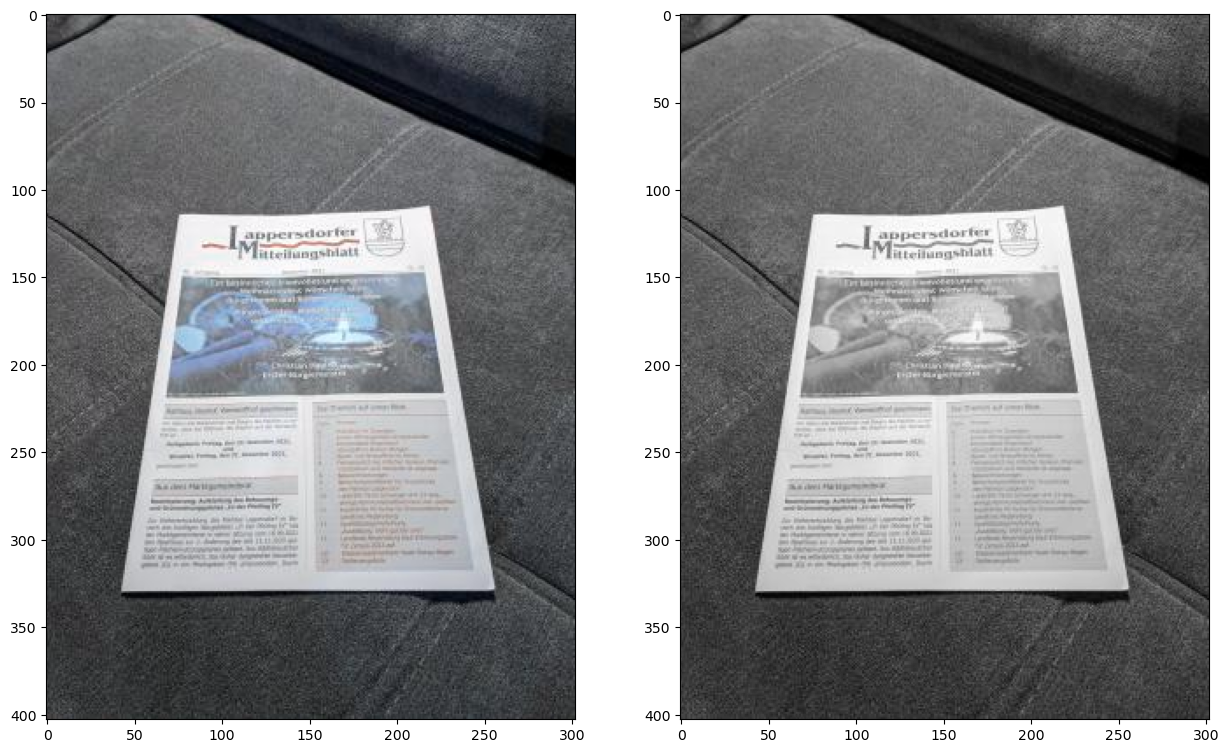

In [2]:
img = cv2.imread('../../lesson_6/data/document.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)/255
rows, cols = gray.shape

# Let's plot the image
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(gray, cmap='gray')

In the previous homework you should have detected the four document corners and you will need to use them here. But don't worry if the previous homework did not work out for you, I am going to provide you with the corners coordinates here :-)

In [3]:
top_left = [76, 115]
top_right = [219, 111]
bottom_left = [43, 330]
bottom_right = [256, 329]

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fb0f0d89d30>)

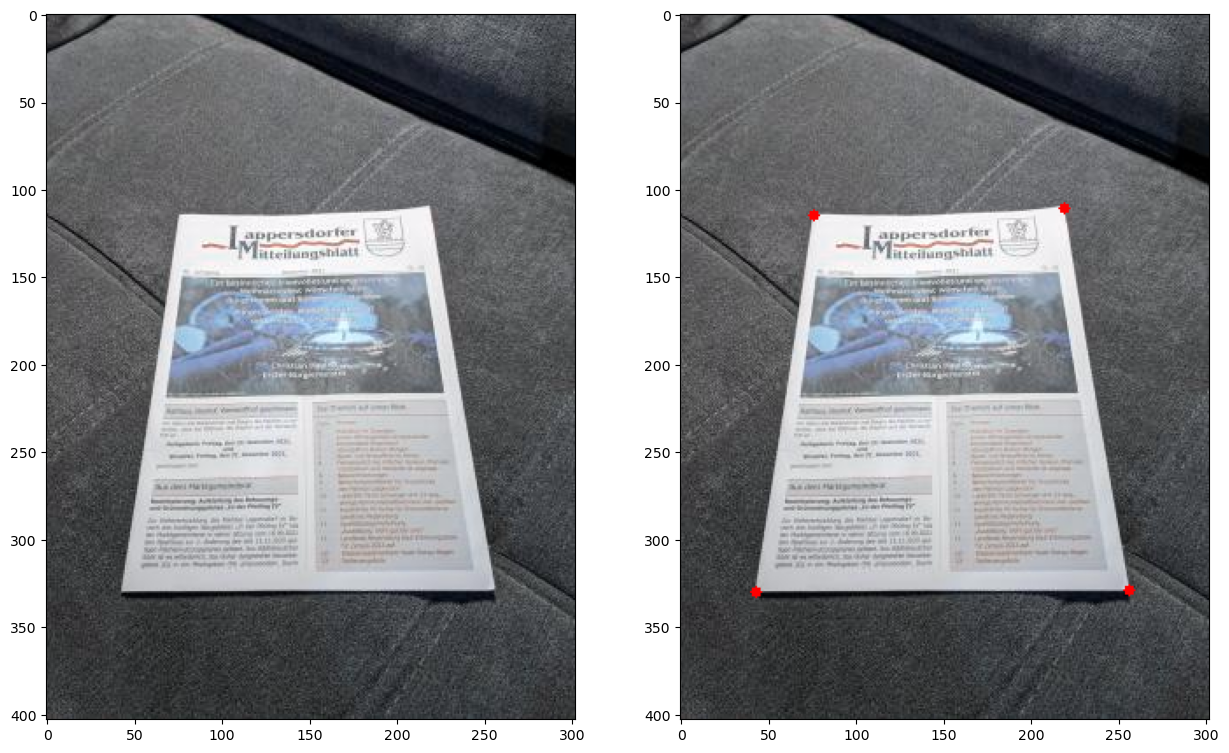

In [4]:
# Let's plot the points
out = np.copy(img)
out = cv2.circle(out, tuple(top_left), 3, (255,0,0), -1)
out = cv2.circle(out, tuple(top_right), 3, (255,0,0), -1)
out = cv2.circle(out, tuple(bottom_left), 3, (255,0,0), -1)
out = cv2.circle(out, tuple(bottom_right), 3, (255,0,0), -1)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(out)

### Document Rectification

Let's now try to rectify the document. The goal is to bring the four document corners to the image corners. For instance, we want the top-left document corner to become (0, 0), i.e., the top-left corner of the image itself. In that way, we will fill the complete image with document information and we will throw away parts of the images that correspond to background (which are of no use to us).

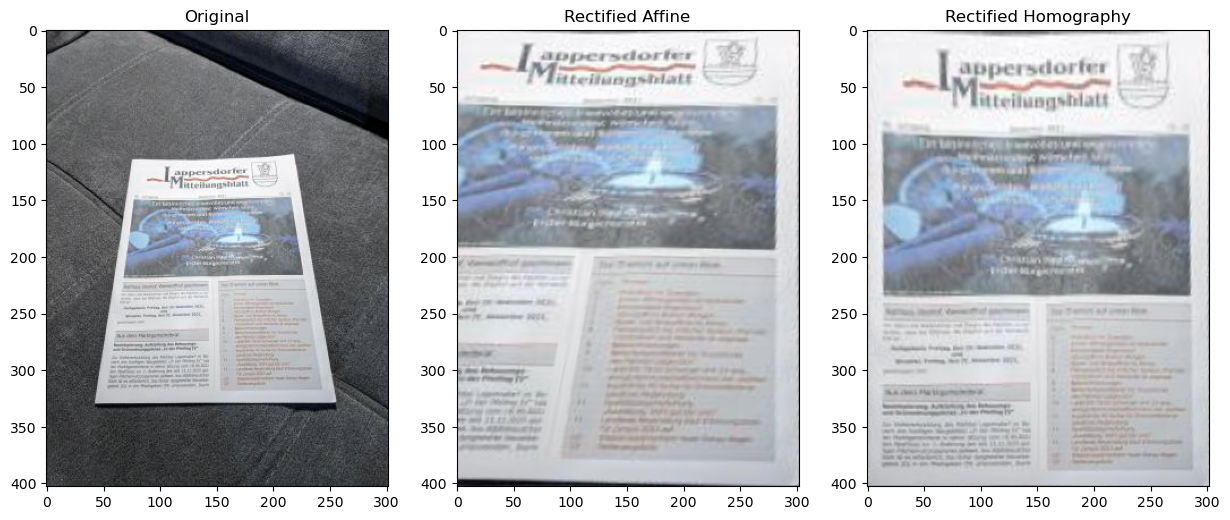

In [5]:
# Define the matrix of source points corresponding to the 4 document corners.
src = np.array([top_left, top_right, bottom_left, bottom_right], dtype=np.float32)

# Define the matrix of target (destination) points corresponding to the 4 image corners.
dst = np.array([[0, 0], [cols, 0], [0, rows], [cols, rows]], dtype=np.float32)

# Estimate the optimal affine transform matrix using estimateAffine2D function from OpenCV
M, inliers = cv2.estimateAffine2D(src, dst)

# Build the rectified image using the computed matrix (use warpAffine)
rectified_affine = cv2.warpAffine(img, M, (cols, rows))

# Compute the homography matrix using getPerspectiveTransform function from OpenCV
M = cv2.getPerspectiveTransform(src, dst)

# Build the rectified image using the computed matrix (use warpPerspective)
rectified_homography = cv2.warpPerspective(img, M, (cols, rows))

# Let's plot the results
plt.subplot(131), plt.imshow(img), plt.title("Original")
plt.subplot(132), plt.imshow(rectified_affine), plt.title("Rectified Affine")
plt.subplot(133), plt.imshow(rectified_homography), plt.title("Rectified Homography")
plt.show()


### Questions
* The affine transform does not seem to be working well in this case. Why?
* What can you tell me about the values you have obtained for the inliers vector? What does it mean?
* How does the result from homography look? Does it work well enough? 

Remember, I am **not** looking for a particular answer. I want to see how you think, so be creative ;-)

In [ ]:
#Выполнение аффинного преобразования может быть неэффективным в данном случае из-за сильных искажений документа.
#Аффинное преобразование сохраняет параллельность линий и изменяет только масштаб, поворот и сдвиг, 
#в то время как искажения в данном изображении могут быть более сложными, и для их коррекции требуется гомография.
#Вектор внутренних точек показывает, какие точки считаются внутренними (1) и какие являются выбросами (0) 
#после применения алгоритма RANSAC. 
#В данном случае, все точки считаются внутренними, что может свидетельствовать о том, 
#что аффинное преобразование не является оптимальным для исправления искажений на данном изображении.
#Результат гомографии выглядит лучше, чем результат аффинного преобразования. 
#Гомография способна исправлять более сложные искажения, такие как перспективные искажения,
#что делает ее более подходящей для данной задачи.